In [232]:
# import all nececssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.internals.base import SingleDataManager
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
LinearRegression = LinearRegression()

In [233]:
# split the dataset into train and test set
data = pd.read_csv("diabetes.csv")

x = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction","Age","Outcome"]]
y = data[["BMI"]]

sc_x = StandardScaler()
xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size = 0.2, random_state = 18)

xCopy = sc_x.fit_transform(xTrain)
XTestCopy = sc_x.transform(xTest)

LinearRegression.fit(xCopy,yTrain)
xTrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
29,5,117,92,0,0,0.337,38,0
286,5,155,84,44,545,0.619,34,0
35,4,103,60,33,192,0.966,33,0
392,1,131,64,14,415,0.389,21,0
12,10,139,80,0,0,1.441,57,0


In [234]:
# perform greedy search to find optimal learning rate.

def extractfeatures(filename):
    x = np.genfromtxt(filename,delimiter=',')
    xfeatures = x[1:,1]
    y = x[1:,2]
    return xfeatures,y

def normalizeFeatures(X):
    mu = np.mean(X)
    X_norm = (X-mu)/sigma
    return X_norm

def computeCost(X,y,theta):
    m = len(y)

    J=0
    s=0

    #iterative solution
    for i in range(0,m):
        s = s + ((theta[0] + theta[1] * X[i,1]) - y[i]) * * 2
    J = s / (2 * m)

    #Vectorized
    y=y.reshape(m,1)
    J1 = (np.dot((np.dot(X,theta) - y).T,(np.dot(X,theta) - y))) / (m * 2)

    return J

def gradientDescent(X,y,theta,alpha,iterations):
    J_history = np.zeros((iterations,1))

    #training examples numbers
    m = len(y)
    y = y.reshape(m,1)

    for iter in range(0,iterations):

        s1=0
        s0=0

        for i in range(0,m):
            s1 += ((theta[0]+theta[1] * X[i,1])-y[i]) * X[i,1]
            s0 += ((theta[0]+theta[1] * X[i,1])-y[i])

        theta[0] = theta[0] - alpha * s0/m
        theta[1] = theta[1] - alpha * s1/m

        J_history[iter] = computeCost(X,y,theta)
    return theta,J_history

Average Mean squared error in Training data prediction is 42.942341807914026
Average Mean squared error in Testing data prediction is 57.81554858534188


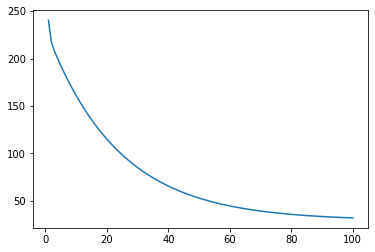

In [235]:
# Plot the "cost function vs iterations" curve

m = len(np.asarray(yTrain))

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Pregnancies"])]
iterations = 100
alpha = 0.05

#gets the final data and the values of cost function in each iteration

theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
plt.plot(a,J_history)

print("Average Mean squared error in Training data prediction is", mean_squared_error(LinearRegression.predict(xCopy),yTrain))
print("Average Mean squared error in Testing data prediction is", mean_squared_error(LinearRegression.predict(XTestCopy),yTest))

By using the method of Greedy Search, we can get optimal theta values for column  1  are  [[28.5206753 ]
 [ 0.54992881]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


By using the method of Greedy Search, we can get optimal theta values for column  2  are  [[5.63952273e+287]
 [7.35388398e+289]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


By using the method of Greedy Search, we can get optimal theta values for column  3  are  [[3.29408686e+238]
 [2.45164857e+240]]
By using the method of Greedy Search, we can get optimal theta values for column  4  are  [[-6.58059751e+147]
 [-2.17068271e+149]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


By using the method of Greedy Search, we can get optimal theta values for column  5  are  [[1.66485385e+298]
 [4.22881329e+300]]
By using the method of Greedy Search, we can get optimal theta values for column  6  are  [[27.19958172]
 [10.17463185]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


By using the method of Greedy Search, we can get optimal theta values for column  7  are  [[2.82781866e+176]
 [1.05998991e+178]]
By using the method of Greedy Search, we can get optimal theta values for column  8  are  [[29.39379913]
 [ 7.0615286 ]]


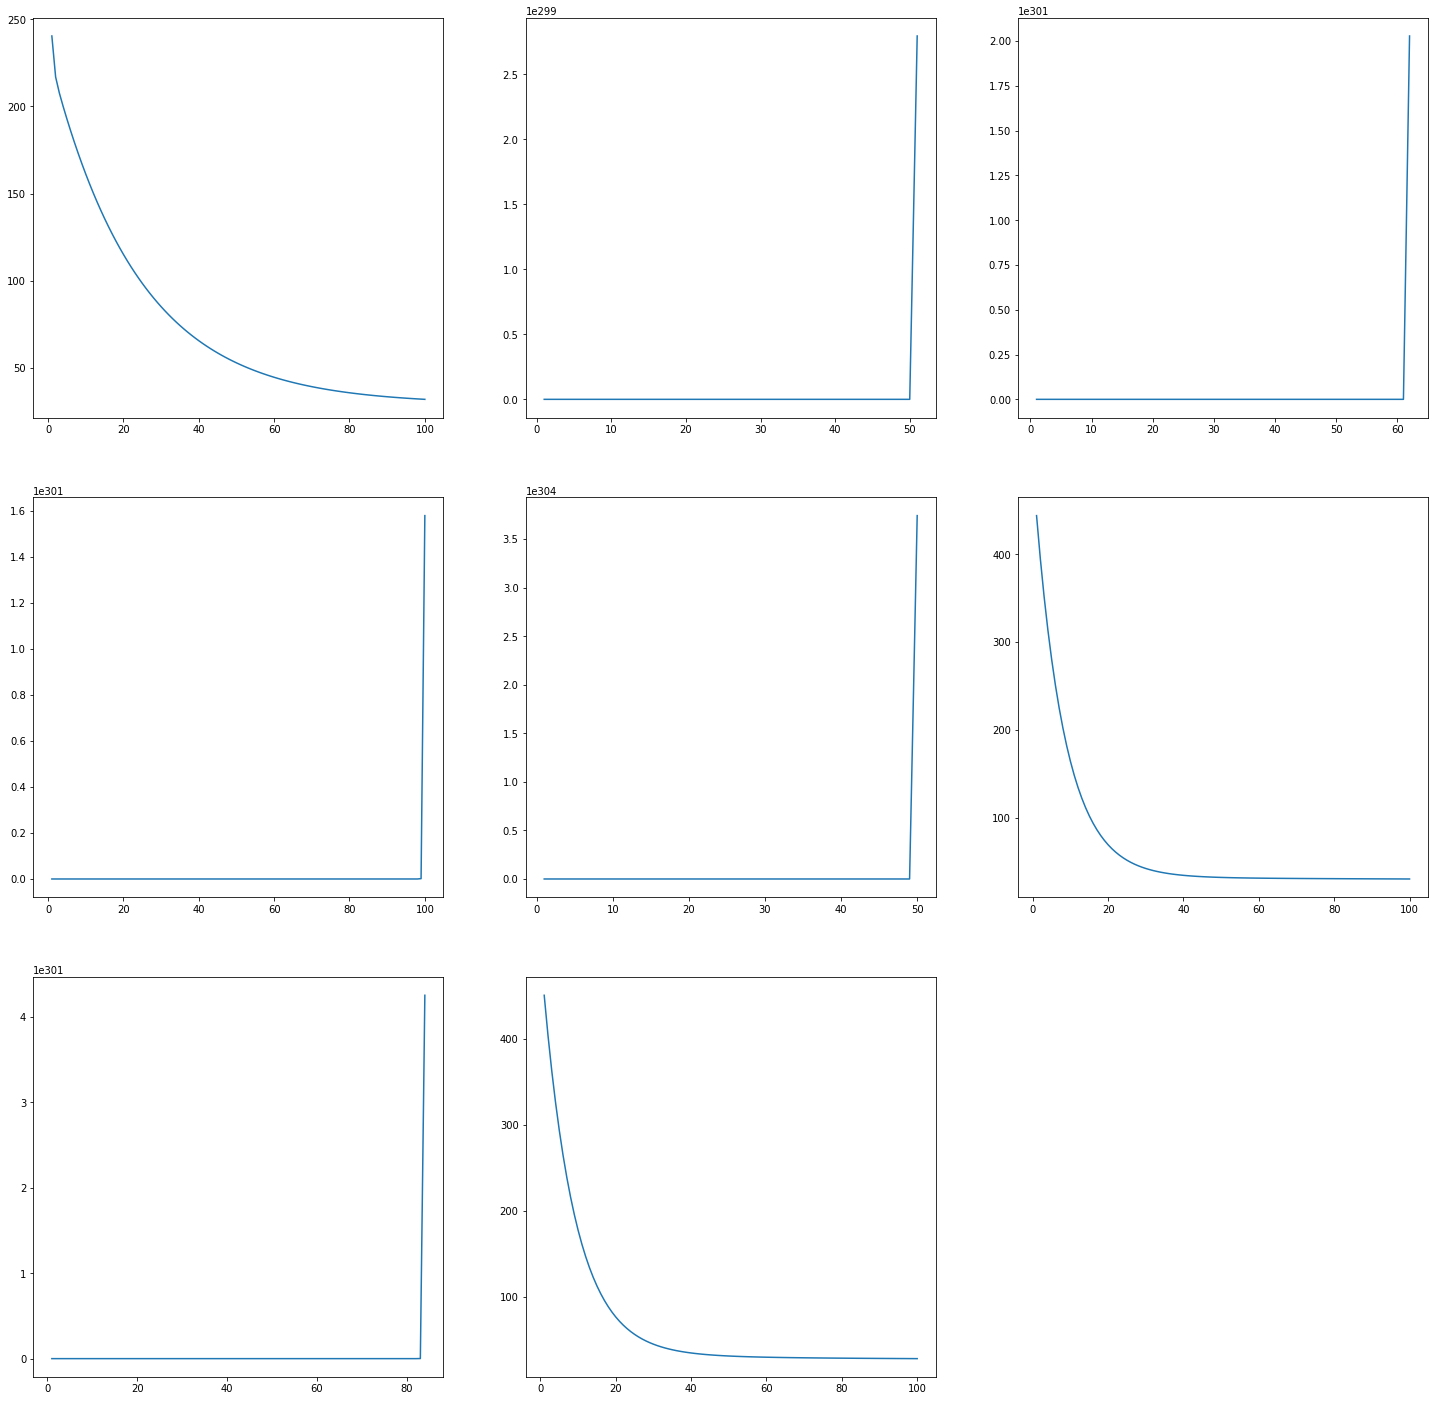

In [236]:
# Learning plot for all predictors
figDraw = plt.figure(figsize = (25,25))

diagram1 = figDraw.add_subplot(3,3,1) 
i = 1
m = len(np.asarray(yTrain))

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Pregnancies"])]
alpha = 0.05
iterations = 100


#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
diagram1.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1

diagram2 = figDraw.add_subplot(3,3,2) 

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X = np.c_[np.ones((m,1)),np.asarray(xTrain["Glucose"])]
alpha = 0.05
iterations = 100


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram2.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1

diagram3 = figDraw.add_subplot(3,3,3)  

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["BloodPressure"])]
alpha = 0.05
iterations = 100


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram3.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1

diagram4 = figDraw.add_subplot(3,3,4)  

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["SkinThickness"])]
alpha = 0.05
iterations = 100


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram4.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1

diagram5 = figDraw.add_subplot(3,3,5)  

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Insulin"])]
alpha = 0.05
iterations=100


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram5.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i+1

diagram6 = figDraw.add_subplot(3,3,6)  

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["DiabetesPedigreeFunction"])]
alpha = 0.05
iterations=100


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram6.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i+1

diagram7 = figDraw.add_subplot(3,3,7)  

#initialize fitting parameters
theta=np.ones((2,1))

#Add a column of ones to X
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Age"])]
alpha = 0.05
iterations = 100

#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram7.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1

diagram8 = figDraw.add_subplot(3,3,8)  

#initialize fitting parameters
theta=np.ones((2,1))

input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Outcome"])]
alpha = 0.05
iterations = 100

#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
diagram8.plot(a,J_history)
print("By using the method of Greedy Search, we can get optimal theta values for column ",i," are ",theta)
i = i + 1


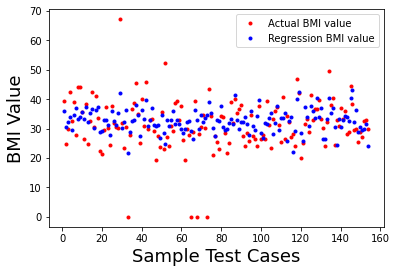

In [237]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 )" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
a = np.arange(start = 1, stop = len(yTest)+1)

plt.figure(1)
plt.plot(a, yTest, 'r.', label = "Actual BMI value")
plt.plot(a, LinearRegression.predict(XTestCopy), 'b.', label = "Regression BMI value")
plt.xlabel("Sample Test Cases", fontsize=18)
plt.legend(loc="best")
plt.ylabel("BMI Value", fontsize=18)
plt.show()

In [238]:
# Train a Linear Regression model to predict "BMI" using all other features avaiable in the dataset
# Saving output file to csv
newOP = yTest
newOP["Predicted BMI"] = LinearRegression.predict(XTestCopy)

In [239]:
# perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents, columns = ["PC1","PC2"])
xTrain,xTest,yTrain,yTest = train_test_split(principal,y, test_size=0.2, random_state=18)
LinearRegression.fit(xTrain,yTrain)
principal.head()

,PC1,PC2
0,-75.746707,-35.807586
1,-82.290258,28.786540
2,-74.517886,-68.418067
3,11.134371,34.751662
4,89.597973,-2.366079


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


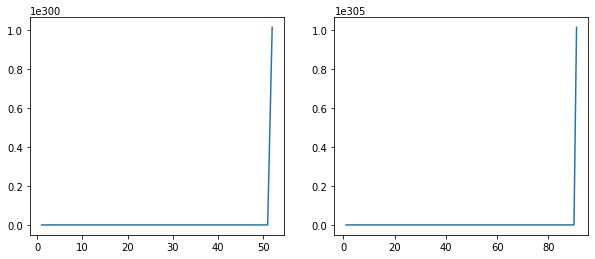

In [240]:
# plot the "cost function vs iterations" curve for this new model.
figDraw = plt.figure(figsize = (10,4))

m = len(np.asarray(yTrain))
dia1 = figDraw.add_subplot(1,2,1) 

#initialize fitting parameters
theta=np.ones((2,1))
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["PC1"])]
iterations=100
alpha = 0.05


#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
dia1.plot(a,J_history)


dia2 = figDraw.add_subplot(1,2,2) 

#initialize fitting parameters
theta=np.ones((2,1))
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["PC2"])]
iterations=100
alpha = 0.05

#gets the final data and the values of cost function in each iteration
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)
a = np.arange(start = 1, stop = len(J_history)+1)
dia2.plot(a,J_history)

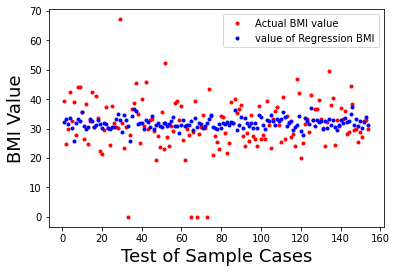

In [241]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 ) of the new model" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
XTest = xTest
a = np.arange(start = 1, stop = len(yTest)+1)
plt.figure(1)

plt.plot(a, yTest, 'r.', label = "Actual BMI value")
plt.plot(a, LinearRegression.predict(XTest), 'b.', label = "value of Regression BMI")

plt.xlabel("Test of Sample Cases", fontsize=18)
plt.ylabel("BMI Value", fontsize=18)

plt.legend(loc="best")
plt.show()

No handles with labels found to put in legend.


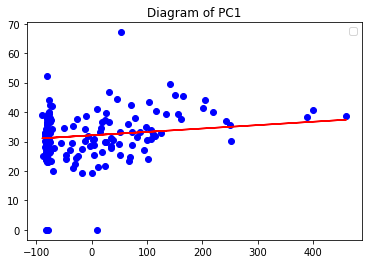

In [242]:
# show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

xTrain2 = xTrain["PC1"]
xTrain2 = xTrain2.values.reshape(-1,1)

xTest2 = xTest["PC1"]
xTest2 = xTest2.values.reshape(-1,1)

LinearRegression.fit(xTrain2,yTrain)

plt.legend(loc="best")
plt.title("Diagram of PC1")
plt.plot(xTest2,LinearRegression.predict(xTest2),color="red",label="Regression")
plt.scatter(xTest2,yTest,color="blue",label="PCA Generated new features")

plt.show()

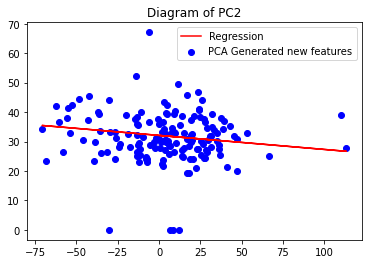

In [243]:
# show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

xTrain3 = xTrain["PC2"]
xTrain3 = xTrain3.values.reshape(-1,1)

xTest3 = xTest["PC2"]
xTest3 = xTest3.values.reshape(-1,1)

LinearRegression.fit(xTrain3,yTrain)

plt.title("Diagram of PC2")
plt.plot(xTest3,LinearRegression.predict(xTest3),color="red",label="Regression")
plt.scatter(xTest3,yTest,color="blue",label="PCA Generated new features")
plt.legend(loc="best")

plt.show()

In [244]:
newOP["Predicted BMI with PCA"] = LinearRegression.predict(xTest2)
newOP.to_csv("FinalCSV.csv", sep=',', index=False)